---
format:
  html:
    code-line-numbers: true
    code-overflow: wrap
    code-block-bg: true
    code-block-border-left: true
    highlight-style: Arrow
---

# Unimodal Function and Search Methods

Nonlinear programming problems are generally hard to solve, but there are certain types of problems that allow efficient solution methods.
In this chapter, we look at unimodal functions and some search methods developed for them.


## Unimodal Function

A function $f$ is unimodal if there exists only one maximum (minimum) point for maximization (minimization) problem.
This means that, for maximization problems, the function increases in value up to a certain point, then decreases in value after reaching its maximum point. 
With unimodal functions, any extreme you find is guaranteed to be the global extreme.
Perhaps the concept of unimodality is better grasped through an example.
Consider the function $f(x)$ defined as

$$
f(x) = (x + 2)^2, \ -10 \leq x <= 10
$$

@fig-unimodal-function plots function $f$ on its defined range.
Note that function $f$ is unimodal only in the minimization case.


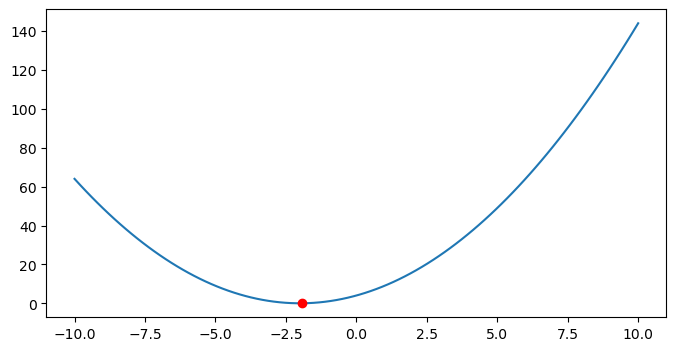

In [141]:
# | echo: false
# | label: fig-unimodal-function
# | fig-cap: An unimodal function

import numpy as np
import math
import matplotlib.pyplot as plt

def f(x):
    return (x + 2)**2

x = [x for x in np.linspace(-10,10,100)]
y = [f(x) for x in x]
plt.figure(figsize=(8,4))
minimum = min(y)
index = y.index(minimum)
plt.plot(x,y)
plt.plot([x[index]],[y[index]],marker="o",color="r")
# plt.title(f'Function is defined within [-10, 10]')
plt.show()

To better appreciate unimodality, let's look at another objective function $\text{min} \ -(1.4 - 2x) \sin(18x)$. @fig-multimodal-function shows its plot within range [0, 0.6]. 
It's clear that there are two local minima for this objective function.

14


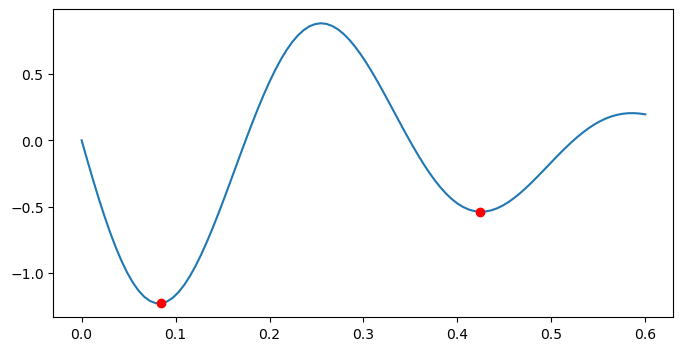

In [142]:
# | echo: false
# | label: fig-multimodal-function
# | fig-cap: A multimodal function

from numpy import sin

def f(x):
    return -(1.4 - 2.0 * x) * sin(18.0 * x)

x = [x for x in np.linspace(0,0.6,100)]
y = [f(x) for x in x]
plt.figure(figsize=(8,4))
minimum = min(y)
index = y.index(minimum)
print(index)
plt.plot(x,y)

index=14
plt.plot([x[index]],[y[index]],marker="o",color="r")
index=70
plt.plot([x[index]],[y[index]],marker="o",color="r")
# plt.title(f'Function is defined within [-10, 10]')
plt.show()

## Equal Interval Search

In this section, we present the equal interval search method.
It is assumed that an initial range $[lb, ub]$ is provided and the pursued minimum or maximum must locate within the range.
The algorithm works as follows:

+ **Inputs:** function $f(x)$ to be minimized, initial range $[lb, ub]$
+ **Output:** local minimum $x^*$
+ **Algorithm Flow:**
  + **Step 1:** Choose a small value $\epsilon$ as the stopping criterion. Let $x^{left} = lb$ and $x^{right} = ub$ denote the initial lower bound and upper bound of the current search range, respectively.
  + **Step 2:** If $x^{right} - x^{left} \leq \epsilon$, then $x^* = \frac{1}{2}(x^{left} + x^{right})$, exit and output $x^*$. Otherwise, choose two middle points according to
  \begin{align}
    x^{(1)} = \frac{x^{left} + x^{right}}{2} - \frac{\epsilon}{2} \\
    x^{(2)} = \frac{x^{left} + x^{right}}{2} + \frac{\epsilon}{2}
  \end{align}
  If $f(x^{(1)}) < f(x^{(2)})$, go to **Step 3**, otherwise, go to step **Step 4**.
  + **Step 3:** Update the current search interval upper bound by
  \begin{align}
    x^{right} = x^{(2)}
  \end{align}
  and proceed to **Step 2**.
  + **Step 4:** Update the current search interval lower bound by
  \begin{align}
    x^{left} = x^{(1)}
  \end{align}
  and proceed to **Step 2**.

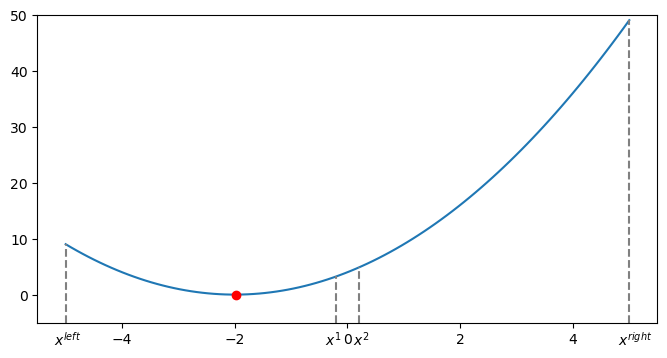

In [143]:
# | echo: false
# | label: fig-unimodal-function-equal-interval-search-iter-1
# | fig-cap: Equal interval search

def f(x):
    return (x + 2)**2

x = [x for x in np.linspace(-5,5,100)]
y = [f(x) for x in x]
plt.figure(figsize=(8,4))
minimum = min(y)
index = y.index(minimum)
plt.ylim([-5, 50])
plt.plot(x,y)
plt.plot([x[index]],[y[index]],marker="o",color="r")
# plt.title(f'Function is defined within [-10, 10]')

x1, y1 = [-5, -5], [-5, f(-5)]
x2, y2 = [5, 5], [-5, f(5)]
x3, y3 = [-0.2, -0.2], [-5, f(-0.2)]
x4, y4 = [0.2, 0.2], [-5, f(0.2)]
plt.plot(x1, y1, x2, y2, x3, y3, x4, y4, linestyle='--', color='gray')
plt.text(-5.2, -9, '$x^{left}$')
plt.text(4.8, -9, '$x^{right}$')
plt.text(-0.4, -9, '$x^{1}$')
plt.text(0.1, -9, '$x^{2}$')
plt.show()

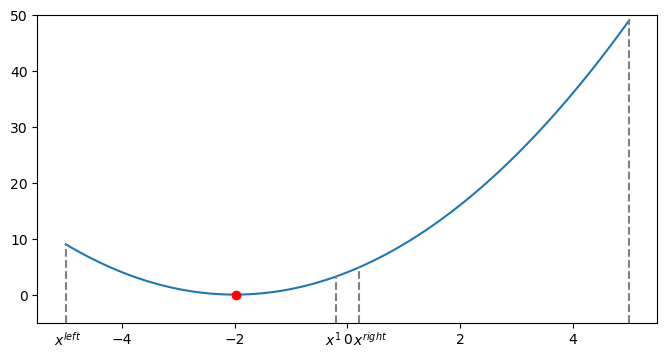

In [144]:
# | echo: false
# | label: fig-unimodal-function-equal-interval-search-iter-2
# | fig-cap: Equal interval search

def f(x):
    return (x + 2)**2

x = [x for x in np.linspace(-5,5,100)]
y = [f(x) for x in x]
plt.figure(figsize=(8,4))
minimum = min(y)
index = y.index(minimum)
plt.ylim([-5, 50])
plt.plot(x,y)
plt.plot([x[index]],[y[index]],marker="o",color="r")
# plt.title(f'Function is defined within [-10, 10]')

x1, y1 = [-5, -5], [-5, f(-5)]
x2, y2 = [5, 5], [-5, f(5)]
x3, y3 = [-0.2, -0.2], [-5, f(-0.2)]
x4, y4 = [0.2, 0.2], [-5, f(0.2)]
plt.plot(x1, y1, x2, y2, x3, y3, x4, y4, linestyle='--', color='gray')
plt.text(-5.2, -9, '$x^{left}$')
plt.text(-0.4, -9, '$x^{1}$')
plt.text(0.1, -9, '$x^{right}$')
plt.show()

In [145]:
def equal_interval_search(func, lb, ub):
    x_left = lb
    x_right = ub
    eps = 0.01
    
    points = np.empty(shape=(0, 4), dtype=float)
    while abs(x_right - x_left - eps) >= 1.e-4:
        x1 = (x_left + x_right) / 2 - eps / 2
        x2 = (x_left + x_right) / 2 + eps / 2
        arr = [x_left, x1, x2, x_right]
        points = np.append(points, [arr], axis=0)
        
        if f(x1) < f(x2):
            x_right = x2
        else:
            x_left = x1
    
    x_opt = (x_left + x_right) / 2
    return x_opt, points

def func(x):
    return (x + 2)**2
x_opt, points = equal_interval_search(func, lb=-5, ub=5)
print(round(x_opt, 2))
    

-2.0


## Golden Section Search